In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

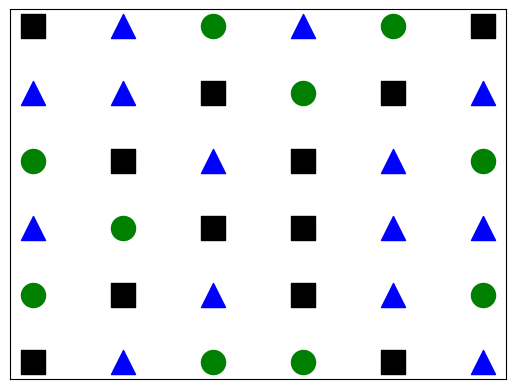

In [ ]:
#GERAR DIGRAFO

numberToLetter = {1:'C',2:'Q',3:'T',4:'E'}
G = nx.Graph()
MATRIZ = [  #Assumir 1=Círculo, 2=Quadrado, 3=Triangulo, 4=Estrela
    [2,3,1,3,1,2],
    [3,3,2,1,2,3],
    [1,2,3,2,3,1],
    [3,1,2,2,3,3],#estrela (3,3)
    [1,2,3,2,3,1],
    [2,3,1,1,2,3]
]



nodes = []
i = 0
posColuna = 0
for linha in MATRIZ:
  for coluna in linha:
    posLinha =  abs(i-5) # 0 = 5, 1= 4, 2=3, 3=2, 4=1, 5=0
    #print(i, posLinha)
    simbolo = MATRIZ[i][posColuna]
    simbolo = numberToLetter[simbolo]
    nodes.append((posColuna, posLinha, simbolo))
    posColuna += 1
  posColuna = 0
  i += 1



pos = dict()
nodeNames = []
for i,j,s in nodes:
  node = str(i)+str(j)+str(s)
  nodeNames.append(node)
  pos[node] = (i,j)


D = nx.DiGraph()
D.add_nodes_from(nodeNames)


quadrados = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'Q']
circulos = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'C']
triangulos = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'T']
especial = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'E']


nx.draw_networkx_nodes(D, pos, nodelist=quadrados, node_color='black',node_shape='s')
nx.draw_networkx_nodes(D, pos, nodelist=circulos, node_color='green',node_shape='o')
nx.draw_networkx_nodes(D, pos, nodelist=triangulos, node_color='blue',node_shape='^')
nx.draw_networkx_nodes(D, pos, nodelist=especial, node_color='yellow',node_shape='*')

In [ ]:
aux=1

def circulo_quadrado(vertice_C,list_quadrados,pos):
  mov=[(-1,1),(0,1),(1,1),(-1,0),(1,0),(-1,-1),(0,-1),(1,-1)]
  aux=1
  novo_q=''
  q_prox=[]
  aux=1
  while(len(q_prox)==0 and aux<7):
    for i in range(len(mov)):
      x = int(vertice_C[0]) + ((mov[i][0])*aux)
      y = int(vertice_C[1]) + ((mov[i][1])*aux)
      if((0<=x<=6)and(0<=y<=6)):
        if(str(x)+str(y)+'Q' in list_quadrados):
          novo_q=str(x)+str(y)+'Q'
          nx.draw_networkx_edges(D, pos, edgelist=[(vertice_C,novo_q)], edge_color='green',connectionstyle='arc3,rad=0.2')
          q_prox.append(str(x)+str(y)+'Q')
    aux=aux+1


  return q_prox



In [ ]:
aux=1

def quadrado_triangulo_ds(q_novo,triangulos,pos):
  mov=[(1,0),(0,-1)]
  aux=1
  novo_t=''
  t_prox=[]
  aux=1
  while(len(t_prox)==0 and aux<7):
    for i in range(len(mov)):
      x = int(q_novo[0]) + ((mov[i][0])*aux)
      y = int(q_novo[1]) + ((mov[i][1])*aux)
      if((0<=x<=6)and(0<=y<=6)):
        if(str(x)+str(y)+'T' in triangulos):
          novo_t=str(x)+str(y)+'T'
          nx.draw_networkx_edges(D, pos, edgelist=[(q_novo,novo_t)], edge_color='black',connectionstyle='arc3,rad=0.2')
          t_prox.append(str(x)+str(y)+'T')
    aux+=aux

  return t_prox


In [ ]:
aux=1
def triangulo_quadrado_dig_f(t_novo,quadrados,pos):
  mov=[(-1,-1),(1,1),(-1,1),(1,-1)]
  aux=1
  novo_q_f=''
  q_prox_f=[]
  aux=1
  while(len(q_prox_f)==0 and aux<7):
    for i in range(len(mov)):
      x = int(t_novo[0]) + ((mov[i][0])*aux)
      y = int(t_novo[1]) + ((mov[i][1])*aux)

      if((0<=x<=6)and(0<=y<=6)):
        if(str(x)+str(y)+'Q' in quadrados):
          novo_q_f=str(x)+str(y)+'Q'
          nx.draw_networkx_edges(D, pos, edgelist=[(t_novo,novo_q_f)], edge_color='blue',connectionstyle='arc3,rad=0.2')
          q_prox_f.append(str(x)+str(y)+'Q')
    aux+=aux

  return q_prox_f

In [ ]:
def draw_estrela(list_estrela,pos):

  if(len(list_estrela)==0):
    print("\njogo invalido nenhum final encontrado\n")

  else:
    aux=list_estrela[0]
    for i in (list_estrela):
      if(i!=aux):
        print('\njogo invalido, mais de um final encontrado',i,' ',aux,'\n')
    nx.draw_networkx_nodes(D, pos, nodelist=list_estrela, node_color='yellow',node_shape='*')

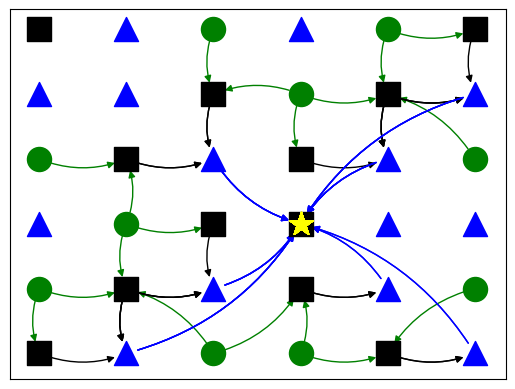

In [ ]:
nx.draw_networkx_nodes(D, pos, nodelist=quadrados, node_color='black',node_shape='s')
nx.draw_networkx_nodes(D, pos, nodelist=circulos, node_color='green',node_shape='o')
nx.draw_networkx_nodes(D, pos, nodelist=triangulos, node_color='blue',node_shape='^')
nx.draw_networkx_nodes(D, pos, nodelist=especial, node_color='yellow',node_shape='*')

l_q_novo=[]
l_t_novo=[]
l_e=[]

for i in circulos:
  aux=[]
  aux=circulo_quadrado(i,quadrados,pos)
  for j in aux:
    l_q_novo.append(j)

for i in l_q_novo:
  aux=[]
  aux=quadrado_triangulo_ds(i,triangulos,pos)
  for j in aux:
    l_t_novo.append(j)

for i in l_t_novo:
  aux=[]
  aux=(triangulo_quadrado_dig_f(i,quadrados,pos))
  for j in aux:
    l_e.append(j)

draw_estrela(l_e,pos)

plt.show()

In [ ]:
def itsover ():
  print("vitor manhais vai tumar no cu")

itsover()

vitor manhais vai tumar no cu


In [ ]:
a=circulos[2]
a[0]
b=[]
print(len(b))

0


# ctrl + h
